In [40]:
import pandas as pd
import numpy as np
import cv2 #!pip install opencv-python
from wordcloud import WordCloud #!pip install wordcloud
import matplotlib.pyplot as plt
import nltk #!pip install nltk
from nltk import FreqDist
# setting up stop words 
nltk.download('stopwords')  # run this if you get any error
stpwrd = set(nltk.corpus.stopwords.words('english'))

import re

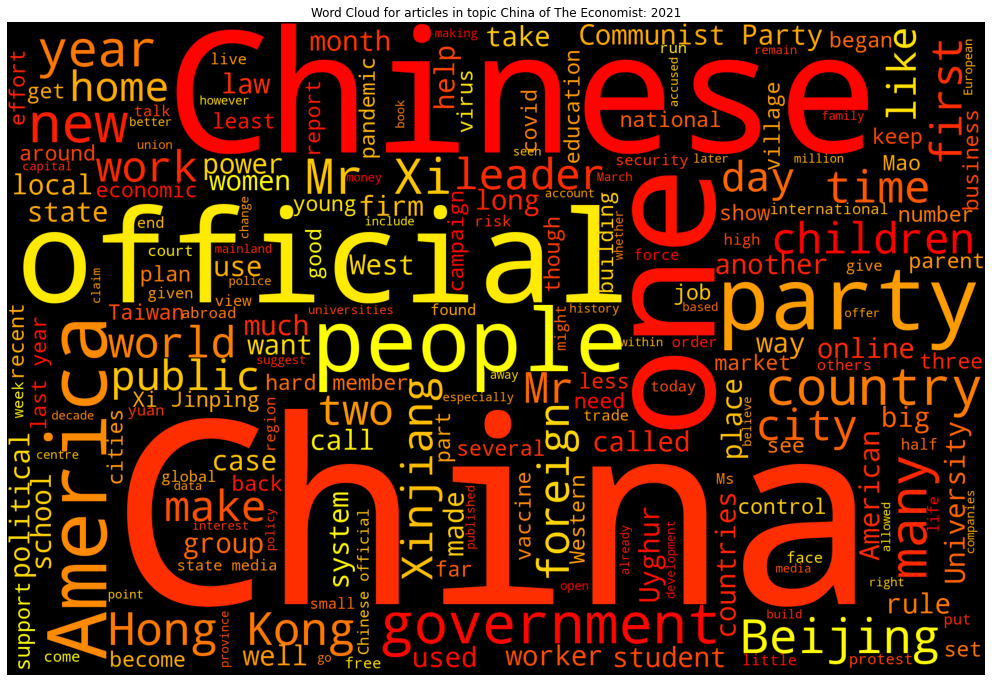

In [57]:
# 'one', 
other_words = ['say', 'says', 'said', 
               'would', 'may', 'could', 'must', 
               'also', 'even', 'still', 'since', 
               'often', 'among', 'almost', 
               'including', 'Yet', 'yet', 'without', 
               'early', 'nearly']
for w in other_words:
    stpwrd.add(w)

###
year = 2021

url = 'https://github.com/mellowLoveGH/the_economist_data01/raw/main/' + str(year) + '.csv'
df_data = pd.read_csv(url, index_col=0)
df_data

tmp_df = df_data[ df_data['topic']=='china' ]
select_text = ' '.join([str(articles) for articles in tmp_df['first_paragraph']])


len(select_text)
select_text.count(' ') # 127474
select_text.count('\n') # 1530


### 
image = cv2.imread("C:/Users/Admin/Desktop/china.jpg") 
PersonImage = image
 
# word cloud
def Word_cloud(data, title, mask=None):
    Cloud = WordCloud(scale=3,
                      random_state=21,
                      colormap='autumn',
                      mask=mask,
                      stopwords=stpwrd,
                      collocations=True,).generate(data)
    plt.figure(figsize=(20,12))
    Cloud.to_file(str(title)+'.png')  #uncomment this if you want to download it
    plt.imshow(Cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    return Cloud
 


"""
freq_dist_pos = FreqDist(select_text)
top_common = 100
words_list = freq_dist_pos.most_common(top_common)
ii = 0
while ii<top_common:
    it = words_list[ii]
    w, f = it
    if w not in stpwrd:
        print(ii, it)
    else:
        print(ii, '-------------------------', it)
    ii += 1

#for w in wc.words_.keys():
    #print(w, select_text.count(w))

df_data
"""

# plot it
search_t = "Word Cloud for articles in topic China of The Economist: "  + str(year)
wc = Word_cloud(select_text, search_t, mask=PersonImage)